# Hotel Booking Demand -EDA AND PREDICTION

**Task : To predict the possibilty of a booking** 

# IMPORTING THE LIBRARIES

In [280]:
# common libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5 # Feature importance evaluation



# load data:
file_path = "/Users/harshit297/Downloads/hotel_bookings.csv"
data = pd.read_csv(file_path)

# LOADING THE DATASET

In [281]:
data[data['is_canceled']==1].head(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.00,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Resort Hotel,1,35,2015,July,29,16,2,4,2,...,No Deposit,240.0,NaN,0,Transient,135.00,0,0,Canceled,2015-06-11
464,Resort Hotel,1,15,2015,July,29,17,0,2,2,...,No Deposit,240.0,NaN,0,Transient,134.00,0,1,Canceled,2015-07-06
465,Resort Hotel,1,7,2015,July,29,17,0,2,2,...,No Deposit,NaN,NaN,0,Transient,127.25,0,1,Canceled,2015-07-13
467,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,No Deposit,241.0,NaN,0,Transient,110.50,0,1,No-Show,2015-07-17


In [282]:
data.describe()      #description of dataset 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [283]:
# check for missing values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [284]:
data.shape   #119390 rows and 32 columns

(119390, 32)

In [285]:
# filling null values with zero

data.fillna(0, inplace = True)

# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data[filter]

data = data[~filter]
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [286]:
data['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [287]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Checking Null Values**



In [288]:
data=data.drop(['company','country'],axis=1)


In [289]:
data=data.dropna()


In [290]:
data.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [291]:
data['reservation_status'].value_counts()





Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [292]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [293]:
data['arrival_date_month'].unique()


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [294]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [295]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [296]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list_cate

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [297]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [298]:

y=data['is_canceled']
x=data.drop(['reservation_status', 'children', 'reservation_status_date','is_canceled'],axis=1)






# TRAINING AND TESTING DATA

In [299]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_X.columns
os_data_y= pd.DataFrame(data=os_data_y,columns=['is_canceled'])
x=os_data_X
y=os_data_y
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['is_canceled']==0]))
print("Number of subscription",len(os_data_y[os_data_y['is_canceled']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['is_canceled']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['is_canceled']==1])/len(os_data_X))



length of oversampled data is  120184
Number of no subscription in oversampled data 60092
Number of subscription 60092
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [300]:
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [301]:
# We can use the functions to apply the models and roc curves to save space.
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# MODELS

# 1. Logistic Regression

In [302]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), os_data_X, X_test, os_data_y, y_test)
acc_reg = accuracy_score(y_test, y_pred)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(os_data_X,os_data_y)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")


Model: Logistic Regression

Accuracy Score: 0.770698766881973

Confusion Matrix:
 [[11967  2952]
 [ 2515  6408]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81     14919
           1       0.68      0.72      0.70      8923

    accuracy                           0.77     23842
   macro avg       0.76      0.76      0.76     23842
weighted avg       0.77      0.77      0.77     23842

Confusion Matrix:
 [[11967  2952]
 [ 2515  6408]]
Training Score:
 67.64045130799441
Accuracy Score of Logistic Regression is : 0.770698766881973


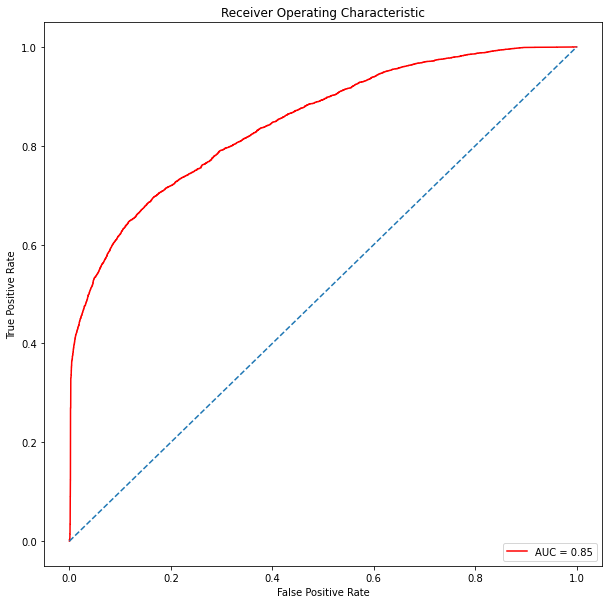

In [303]:
ROC(y_test, y_prob)


# 2. KNeighborsClassifier

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**

In [304]:
print('Model: KNeighboursClassifier \n')
model(KNeighborsClassifier(), os_data_X, X_test, os_data_y, y_test)
acc_reg = accuracy_score(y_test, y_pred)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(os_data_X,os_data_y)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Model: KNeighboursClassifier 

Accuracy Score: 0.7546346782988005

Confusion Matrix:
 [[11246  3673]
 [ 2177  6746]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79     14919
           1       0.65      0.76      0.70      8923

    accuracy                           0.75     23842
   macro avg       0.74      0.75      0.75     23842
weighted avg       0.77      0.75      0.76     23842

Confusion Matrix:
 [[11246  3673]
 [ 2177  6746]]
Training Score:
 67.64045130799441
Accuracy Score of Logistic Regression is : 0.7546346782988005


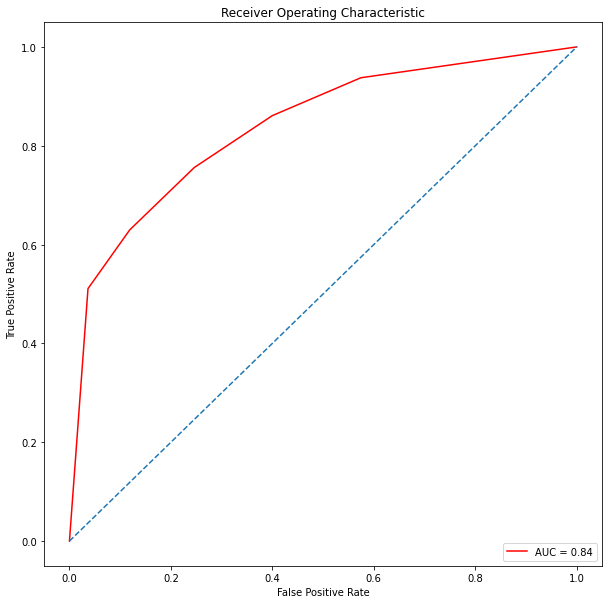

In [271]:
ROC(y_test, y_prob)


# 3. DECISION TREE CLASSIFIER

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**


In [305]:
from sklearn.tree import DecisionTreeClassifier
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), os_data_X, X_test, os_data_y, y_test)
acc_reg = accuracy_score(y_test, y_pred)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(os_data_X,os_data_y)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")


Model: Decision Tree

Accuracy Score: 0.8200654307524536

Confusion Matrix:
 [[13216  1703]
 [ 2587  6336]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86     14919
           1       0.79      0.71      0.75      8923

    accuracy                           0.82     23842
   macro avg       0.81      0.80      0.80     23842
weighted avg       0.82      0.82      0.82     23842

Confusion Matrix:
 [[13216  1703]
 [ 2587  6336]]
Training Score:
 67.64045130799441
Accuracy Score of Logistic Regression is : 0.8200654307524536


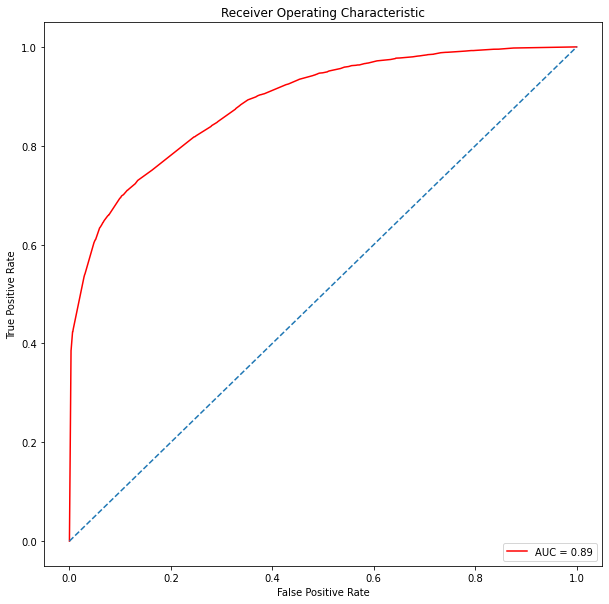

In [306]:
ROC(y_test, y_prob)


 # 4.Random Forest Classifier


**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
print('Model: Random Forest\n')
model(RandomForestClassifier(), os_data_X, X_test, os_data_y, y_test)
acc_reg = accuracy_score(y_test, y_pred)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(os_data_X,os_data_y)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Model: Random Forest

Accuracy Score: 0.8717808908648603

Confusion Matrix:
 [[13568  1351]
 [ 1706  7217]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     14919
           1       0.84      0.81      0.83      8923

    accuracy                           0.87     23842
   macro avg       0.87      0.86      0.86     23842
weighted avg       0.87      0.87      0.87     23842

Confusion Matrix:
 [[13568  1351]
 [ 1706  7217]]
Training Score:
 67.64045130799441
Accuracy Score of Logistic Regression is : 0.8717808908648603


In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
print('Model: Random Forest\n')
model(RandomForestClassifier(), x_train, x_test, Y_train, Y_test)
acc_reg = accuracy_score(Y_test, y_pred)
print("Classification Report is:\n",classification_report(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred))
print("Training Score:\n",reg.score(x_train,Y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Model: Random Forest

Accuracy Score: 0.8848025959978366

Confusion Matrix:
 [[10952  1125]
 [ 1644 10316]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     12077
           1       0.90      0.86      0.88     11960

    accuracy                           0.88     24037
   macro avg       0.89      0.88      0.88     24037
weighted avg       0.89      0.88      0.88     24037

Confusion Matrix:
 [[10952  1125]
 [ 1644 10316]]
Training Score:
 67.71402123831217
Accuracy Score of Logistic Regression is : 0.8848025959978366


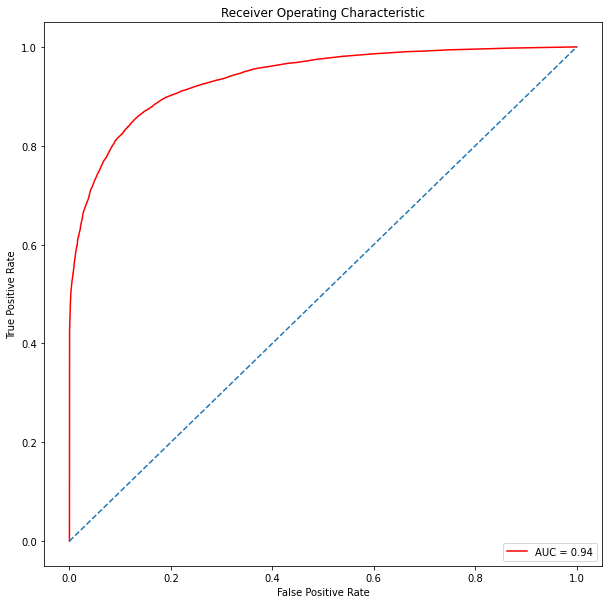

In [275]:
ROC(y_test, y_prob)


Text(0.5, 0, 'Feature Importances (%)')

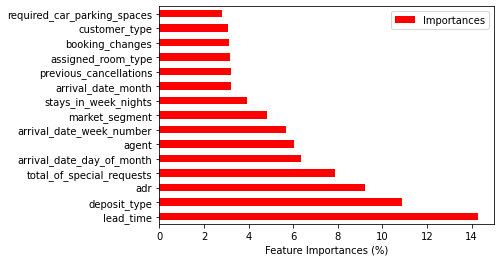

In [276]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(os_data_X, os_data_y)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")

# 5. Naive Bayes Classifier

**An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.**


In [277]:
from sklearn.naive_bayes import GaussianNB

print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), os_data_X, X_test, os_data_y, y_test)
acc_reg = accuracy_score(y_test, y_pred)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(os_data_X,os_data_y)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")


Model: Gaussian Naive Bayes

Accuracy Score: 0.5507507759416156

Confusion Matrix:
 [[5066 9853]
 [ 858 8065]]
Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.34      0.49     14919
           1       0.45      0.90      0.60      8923

    accuracy                           0.55     23842
   macro avg       0.65      0.62      0.54     23842
weighted avg       0.70      0.55      0.53     23842

Confusion Matrix:
 [[5066 9853]
 [ 858 8065]]
Training Score:
 67.64045130799441
Accuracy Score of Logistic Regression is : 0.5507507759416156


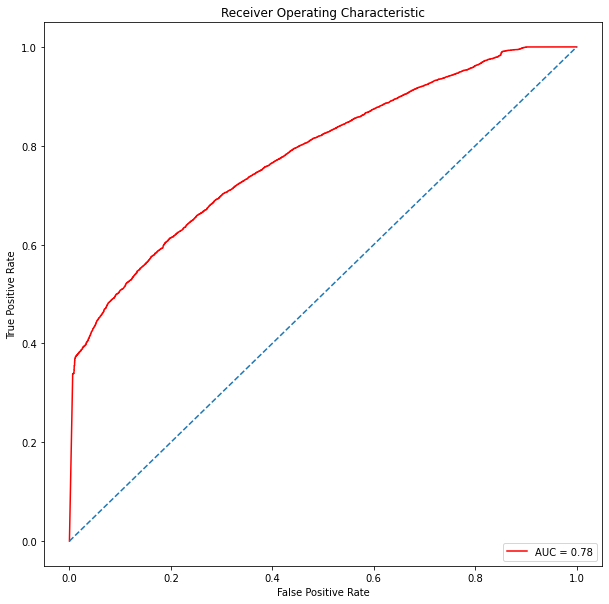

In [279]:
ROC(y_test, y_prob)


# CONCLUSION : 

**So we get a accuracy score of 87 % using the Random Forest Classifier which is highest among all models** 